<a href="https://colab.research.google.com/github/madhusudhan0211/Machine_Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df=pd.get_dummies(df,columns=['Pedigree','SkinThickness'],drop_first=True)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Pedigree_0.084,Pedigree_0.085,Pedigree_0.088,Pedigree_0.089,Pedigree_0.092,Pedigree_0.096,Pedigree_0.1,Pedigree_0.101,Pedigree_0.102,Pedigree_0.107,Pedigree_0.108,Pedigree_0.115,Pedigree_0.118,Pedigree_0.121,Pedigree_0.122,Pedigree_0.123,Pedigree_0.126,Pedigree_0.127,Pedigree_0.128,Pedigree_0.129,Pedigree_0.13,Pedigree_0.133,Pedigree_0.134,Pedigree_0.135,Pedigree_0.136,Pedigree_0.137,Pedigree_0.138,Pedigree_0.14,Pedigree_0.141,Pedigree_0.142,Pedigree_0.143,Pedigree_0.144,Pedigree_0.145,...,SkinThickness_18,SkinThickness_19,SkinThickness_20,SkinThickness_21,SkinThickness_22,SkinThickness_23,SkinThickness_24,SkinThickness_25,SkinThickness_26,SkinThickness_27,SkinThickness_28,SkinThickness_29,SkinThickness_30,SkinThickness_31,SkinThickness_32,SkinThickness_33,SkinThickness_34,SkinThickness_35,SkinThickness_36,SkinThickness_37,SkinThickness_38,SkinThickness_39,SkinThickness_40,SkinThickness_41,SkinThickness_42,SkinThickness_43,SkinThickness_44,SkinThickness_45,SkinThickness_46,SkinThickness_47,SkinThickness_48,SkinThickness_49,SkinThickness_50,SkinThickness_51,SkinThickness_52,SkinThickness_54,SkinThickness_56,SkinThickness_60,SkinThickness_63,SkinThickness_99
0,6,148,72,0,33.6,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,85,66,0,26.6,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,183,64,0,23.3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,89,66,94,28.1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,137,40,168,43.1,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc= StandardScaler()

In [12]:
X=df.loc[:,df.columns!= 'Outcome']

In [13]:
Y=df['Outcome']

In [14]:
X= sc.fit_transform(X)

In [15]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.03610791,
        -0.03610791, -0.03610791],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.03610791,
        -0.03610791, -0.03610791],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.03610791,
        -0.03610791, -0.03610791],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.03610791,
        -0.03610791, -0.03610791],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.03610791,
        -0.03610791, -0.03610791],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.03610791,
        -0.03610791, -0.03610791]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
acc_list = []
err_list =[]
for i in range(1,30):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  acc = accuracy_score(Y_test,Y_pred)
  acc_list.append(acc)
  err_list.append(1-acc)


In [27]:
import matplotlib.pyplot as plt


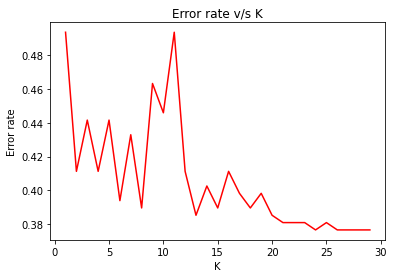

In [33]:
plt.plot(list(range(1,30)),err_list, c ='r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()